In [1]:
import pandas as pd 
import numpy as np

In [2]:
import pandas as pd

# Load full dataset
data = pd.read_csv("C:/Users/HARINI/OneDrive/Documents/new_train_sample/new_train_sample.csv")
# Save mini dataset
mini_df = data.sample(n=100000, random_state=42)  # reproducible rando
mini_df.to_csv("train_dataset.csv", index=False)

In [3]:
mini_df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
4664997,5505944,1151051239177,12,2278,1280,2024-05-22T19:35:58.000Z,16,499,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3950835,6416977,936302871369,862,16616,40332,2024-06-14T19:48:25.000Z,11,9,InitialAccess,T1566,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
1831432,1186440,455266534648,1002,3187,3292,2024-06-03T06:49:41.000Z,665,891,CredentialAccess,T1558;T1558.003,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
1953711,3191070,1288490192781,619,372328,850243,2024-06-11T04:18:12.000Z,0,0,InitialAccess,T1078;T1078.004,...,NaN,NaN,5,66,NaN,NaN,NaN,2,2,14
2413287,1509806,1262720387558,28,346,2659,2024-06-03T06:58:13.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,1278488,936302873565,73,200701,478976,2024-06-14T21:09:54.000Z,355,55670,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
3688117,2028414,1443109014578,63,363,357981,2024-06-03T14:06:15.000Z,314,312,LateralMovement,T1534,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
173575,2387899,137438953895,54,127782,112088,2024-06-04T18:14:28.000Z,934,27670,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
16108,6742648,1202590844266,44,8431,11973,2024-06-06T22:28:02.000Z,50,36,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
mini_df.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
MitreTechniques       57291
IncidentGrade           569
ActionGrouped         99380
ActionGranular        99380
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
EmailClusterId        98997
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
ThreatFamily          99215
FileName                  0
FolderPath                0
ResourceIdName      

In [5]:
mini_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    42997
TruePositive      35121
FalsePositive     21313
Name: count, dtype: int64

In [6]:
mini_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4664997 to 712870
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          100000 non-null  int64  
 1   Id                  100000 non-null  int64  
 2   OrgId               100000 non-null  int64  
 3   IncidentId          100000 non-null  int64  
 4   AlertId             100000 non-null  int64  
 5   Timestamp           100000 non-null  object 
 6   DetectorId          100000 non-null  int64  
 7   AlertTitle          100000 non-null  int64  
 8   Category            100000 non-null  object 
 9   MitreTechniques     42709 non-null   object 
 10  IncidentGrade       99431 non-null   object 
 11  ActionGrouped       620 non-null     object 
 12  ActionGranular      620 non-null     object 
 13  EntityType          100000 non-null  object 
 14  EvidenceRole        100000 non-null  object 
 15  DeviceId            100000 non-nu

In [7]:
mini_df.drop(columns=['ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict','ThreatFamily'],axis=1,inplace=True)

In [8]:
mini_df.drop(columns=['MitreTechniques', 'ActionGrouped', 'ActionGranular','EmailClusterId'],axis=1, inplace=True)

In [9]:
mini_df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
4664997,5505944,1151051239177,12,2278,1280,2024-05-22T19:35:58.000Z,16,499,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3950835,6416977,936302871369,862,16616,40332,2024-06-14T19:48:25.000Z,11,9,InitialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1831432,1186440,455266534648,1002,3187,3292,2024-06-03T06:49:41.000Z,665,891,CredentialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1953711,3191070,1288490192781,619,372328,850243,2024-06-11T04:18:12.000Z,0,0,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,2,2,14
2413287,1509806,1262720387558,28,346,2659,2024-06-03T06:58:13.000Z,1,1,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,1278488,936302873565,73,200701,478976,2024-06-14T21:09:54.000Z,355,55670,Exfiltration,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3688117,2028414,1443109014578,63,363,357981,2024-06-03T14:06:15.000Z,314,312,LateralMovement,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
173575,2387899,137438953895,54,127782,112088,2024-06-04T18:14:28.000Z,934,27670,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
16108,6742648,1202590844266,44,8431,11973,2024-06-06T22:28:02.000Z,50,36,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [10]:
mini_df.drop_duplicates()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
4664997,5505944,1151051239177,12,2278,1280,2024-05-22T19:35:58.000Z,16,499,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3950835,6416977,936302871369,862,16616,40332,2024-06-14T19:48:25.000Z,11,9,InitialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1831432,1186440,455266534648,1002,3187,3292,2024-06-03T06:49:41.000Z,665,891,CredentialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1953711,3191070,1288490192781,619,372328,850243,2024-06-11T04:18:12.000Z,0,0,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,2,2,14
2413287,1509806,1262720387558,28,346,2659,2024-06-03T06:58:13.000Z,1,1,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,1278488,936302873565,73,200701,478976,2024-06-14T21:09:54.000Z,355,55670,Exfiltration,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3688117,2028414,1443109014578,63,363,357981,2024-06-03T14:06:15.000Z,314,312,LateralMovement,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
173575,2387899,137438953895,54,127782,112088,2024-06-04T18:14:28.000Z,934,27670,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
16108,6742648,1202590844266,44,8431,11973,2024-06-06T22:28:02.000Z,50,36,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [11]:
thresh = len(mini_df) * 0.5   #thresh has a int value of no of 50% rows
df_train = mini_df.dropna(thresh = thresh,axis=1)

In [12]:
mini_df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
4664997,5505944,1151051239177,12,2278,1280,2024-05-22T19:35:58.000Z,16,499,Impact,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3950835,6416977,936302871369,862,16616,40332,2024-06-14T19:48:25.000Z,11,9,InitialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1831432,1186440,455266534648,1002,3187,3292,2024-06-03T06:49:41.000Z,665,891,CredentialAccess,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1953711,3191070,1288490192781,619,372328,850243,2024-06-11T04:18:12.000Z,0,0,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,2,2,14
2413287,1509806,1262720387558,28,346,2659,2024-06-03T06:58:13.000Z,1,1,InitialAccess,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,1278488,936302873565,73,200701,478976,2024-06-14T21:09:54.000Z,355,55670,Exfiltration,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3688117,2028414,1443109014578,63,363,357981,2024-06-03T14:06:15.000Z,314,312,LateralMovement,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
173575,2387899,137438953895,54,127782,112088,2024-06-04T18:14:28.000Z,934,27670,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
16108,6742648,1202590844266,44,8431,11973,2024-06-06T22:28:02.000Z,50,36,Exfiltration,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [13]:
mini_df.isnull().sum()

Unnamed: 0              0
Id                      0
OrgId                   0
IncidentId              0
AlertId                 0
Timestamp               0
DetectorId              0
AlertTitle              0
Category                0
IncidentGrade         569
EntityType              0
EvidenceRole            0
DeviceId                0
Sha256                  0
IpAddress               0
Url                     0
AccountSid              0
AccountUpn              0
AccountObjectId         0
AccountName             0
DeviceName              0
NetworkMessageId        0
RegistryKey             0
RegistryValueName       0
RegistryValueData       0
ApplicationId           0
ApplicationName         0
OAuthApplicationId      0
FileName                0
FolderPath              0
ResourceIdName          0
OSFamily                0
OSVersion               0
CountryCode             0
State                   0
City                    0
dtype: int64

In [14]:
mini_df.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')

In [15]:
mini_df=mini_df.drop(columns=['Unnamed: 0'])#drop uneven column

In [16]:
mini_df['IncidentGrade'] = mini_df['IncidentGrade'].fillna(mini_df['IncidentGrade'].mode()[0])

In [17]:
mini_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [18]:
mini_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4664997 to 712870
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  100000 non-null  int64 
 1   OrgId               100000 non-null  int64 
 2   IncidentId          100000 non-null  int64 
 3   AlertId             100000 non-null  int64 
 4   Timestamp           100000 non-null  object
 5   DetectorId          100000 non-null  int64 
 6   AlertTitle          100000 non-null  int64 
 7   Category            100000 non-null  object
 8   IncidentGrade       100000 non-null  object
 9   EntityType          100000 non-null  object
 10  EvidenceRole        100000 non-null  object
 11  DeviceId            100000 non-null  int64 
 12  Sha256              100000 non-null  int64 
 13  IpAddress           100000 non-null  int64 
 14  Url                 100000 non-null  int64 
 15  AccountSid          100000 non-null  int64 
 16  A

In [19]:
mini_df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
4664997,1151051239177,12,2278,1280,2024-05-22T19:35:58.000Z,16,499,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3950835,936302871369,862,16616,40332,2024-06-14T19:48:25.000Z,11,9,InitialAccess,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1831432,455266534648,1002,3187,3292,2024-06-03T06:49:41.000Z,665,891,CredentialAccess,BenignPositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
1953711,1288490192781,619,372328,850243,2024-06-11T04:18:12.000Z,0,0,InitialAccess,FalsePositive,Ip,...,3421,881,289573,117668,3586,5,66,2,2,14
2413287,1262720387558,28,346,2659,2024-06-03T06:58:13.000Z,1,1,InitialAccess,FalsePositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,936302873565,73,200701,478976,2024-06-14T21:09:54.000Z,355,55670,Exfiltration,FalsePositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3688117,1443109014578,63,363,357981,2024-06-03T14:06:15.000Z,314,312,LateralMovement,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630
173575,137438953895,54,127782,112088,2024-06-04T18:14:28.000Z,934,27670,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
16108,1202590844266,44,8431,11973,2024-06-06T22:28:02.000Z,50,36,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [20]:
mini_df['Timestamp']= pd.to_datetime(mini_df['Timestamp'])

mini_df['year'] = mini_df['Timestamp'].dt.year
mini_df['month'] = mini_df['Timestamp'].dt.month
mini_df['day'] = mini_df['Timestamp'].dt.day
mini_df['hour'] = mini_df['Timestamp'].dt.hour

In [21]:
mini_df.drop('Timestamp',axis=1,inplace=True)

In [22]:
mini_df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,year,month,day,hour
4664997,1151051239177,12,2278,1280,16,499,Impact,BenignPositive,Ip,Related,...,3586,5,66,242,1445,10630,2024,5,22,19
3950835,936302871369,862,16616,40332,11,9,InitialAccess,BenignPositive,MailMessage,Related,...,3586,5,66,242,1445,10630,2024,6,14,19
1831432,455266534648,1002,3187,3292,665,891,CredentialAccess,BenignPositive,User,Impacted,...,3586,5,66,242,1445,10630,2024,6,3,6
1953711,1288490192781,619,372328,850243,0,0,InitialAccess,FalsePositive,Ip,Related,...,3586,5,66,2,2,14,2024,6,11,4
2413287,1262720387558,28,346,2659,1,1,InitialAccess,FalsePositive,MailMessage,Related,...,3586,5,66,242,1445,10630,2024,6,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970677,936302873565,73,200701,478976,355,55670,Exfiltration,FalsePositive,MailMessage,Impacted,...,3586,5,66,242,1445,10630,2024,6,14,21
3688117,1443109014578,63,363,357981,314,312,LateralMovement,TruePositive,Ip,Related,...,3586,5,66,242,1445,10630,2024,6,3,14
173575,137438953895,54,127782,112088,934,27670,Exfiltration,BenignPositive,MailMessage,Impacted,...,3586,5,66,242,1445,10630,2024,6,4,18
16108,1202590844266,44,8431,11973,50,36,Exfiltration,BenignPositive,MailMessage,Impacted,...,3586,5,66,242,1445,10630,2024,6,6,22


In [23]:
mini_df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,year,month,day,hour
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.437091e+11,183.231120,70736.243190,4.072697e+05,107.40087,2925.370510,95634.451330,128769.470020,286105.308810,150495.509610,...,3583.309010,4.897930,64.647680,223.906120,1352.659010,9945.512580,2023.999990,5.911150,9.777620,12.135960
std,4.969950e+11,388.637108,121479.019348,4.599532e+05,422.81584,11362.501735,16418.217779,33897.946939,141016.579365,37238.623282,...,92.582792,0.705774,9.343652,62.455086,348.959743,2590.578634,0.003162,0.288403,6.113708,6.785321
min,3.100000e+01,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000,0.000000
25%,4.123169e+11,10.000000,505.000000,2.371425e+04,2.00000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,5.000000,6.000000
50%,8.418136e+11,45.000000,10372.500000,2.159595e+05,9.00000,11.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,9.000000,13.000000
75%,1.271310e+12,174.000000,83549.000000,6.699258e+05,45.00000,182.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,12.000000,18.000000
max,1.709397e+12,6042.000000,599702.000000,1.721408e+06,9356.00000,113089.000000,98799.000000,138268.000000,360606.000000,160396.000000,...,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,12.000000,31.000000,23.000000


In [24]:
mini_df.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
year                  0
month                 0
day                   0
hour                  0
dtype: int64

Visualization


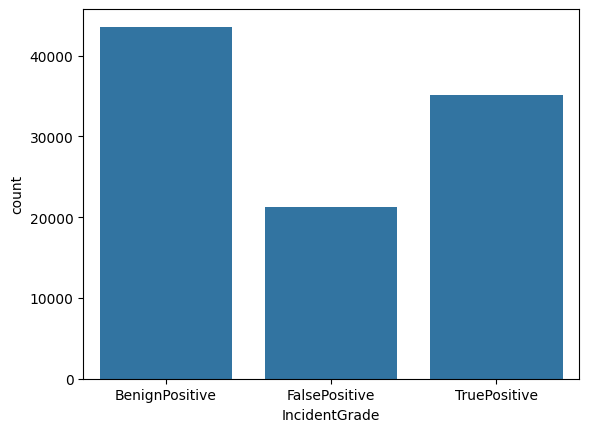

In [25]:
# Count plot by Target column classes 
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='IncidentGrade', data=mini_df)
plt.show()

In [26]:
mini_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    43566
TruePositive      35121
FalsePositive     21313
Name: count, dtype: int64

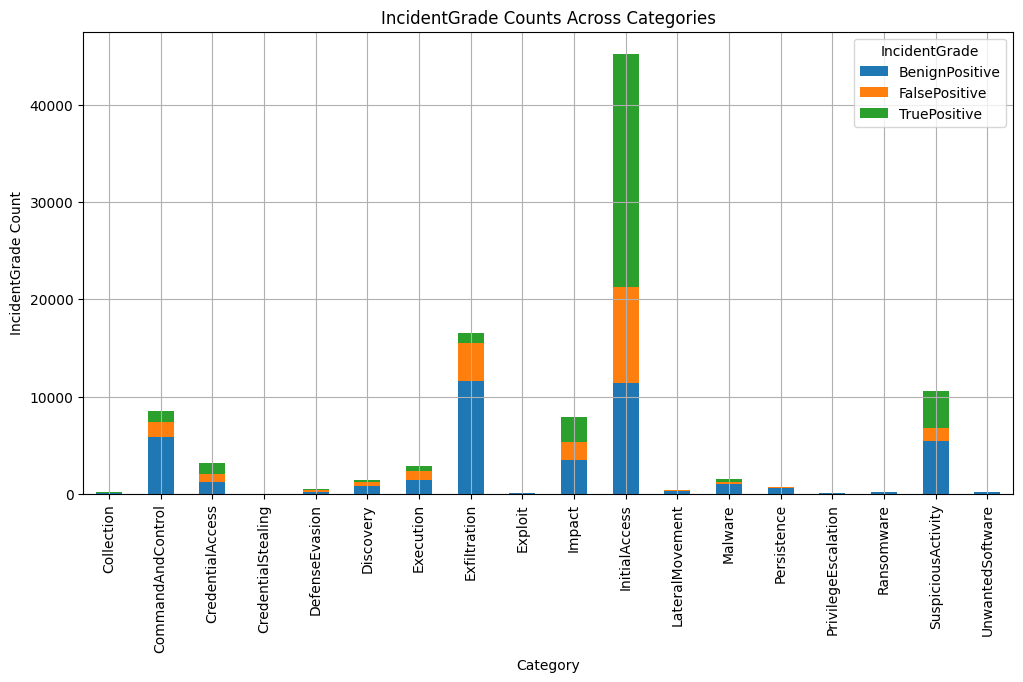

In [27]:
# Bar plot of IncidentGrade count by Category

grouped_data=mini_df.groupby(["Category","IncidentGrade"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Category')
plt.ylabel('IncidentGrade Count')
plt.title('IncidentGrade Counts Across Categories')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

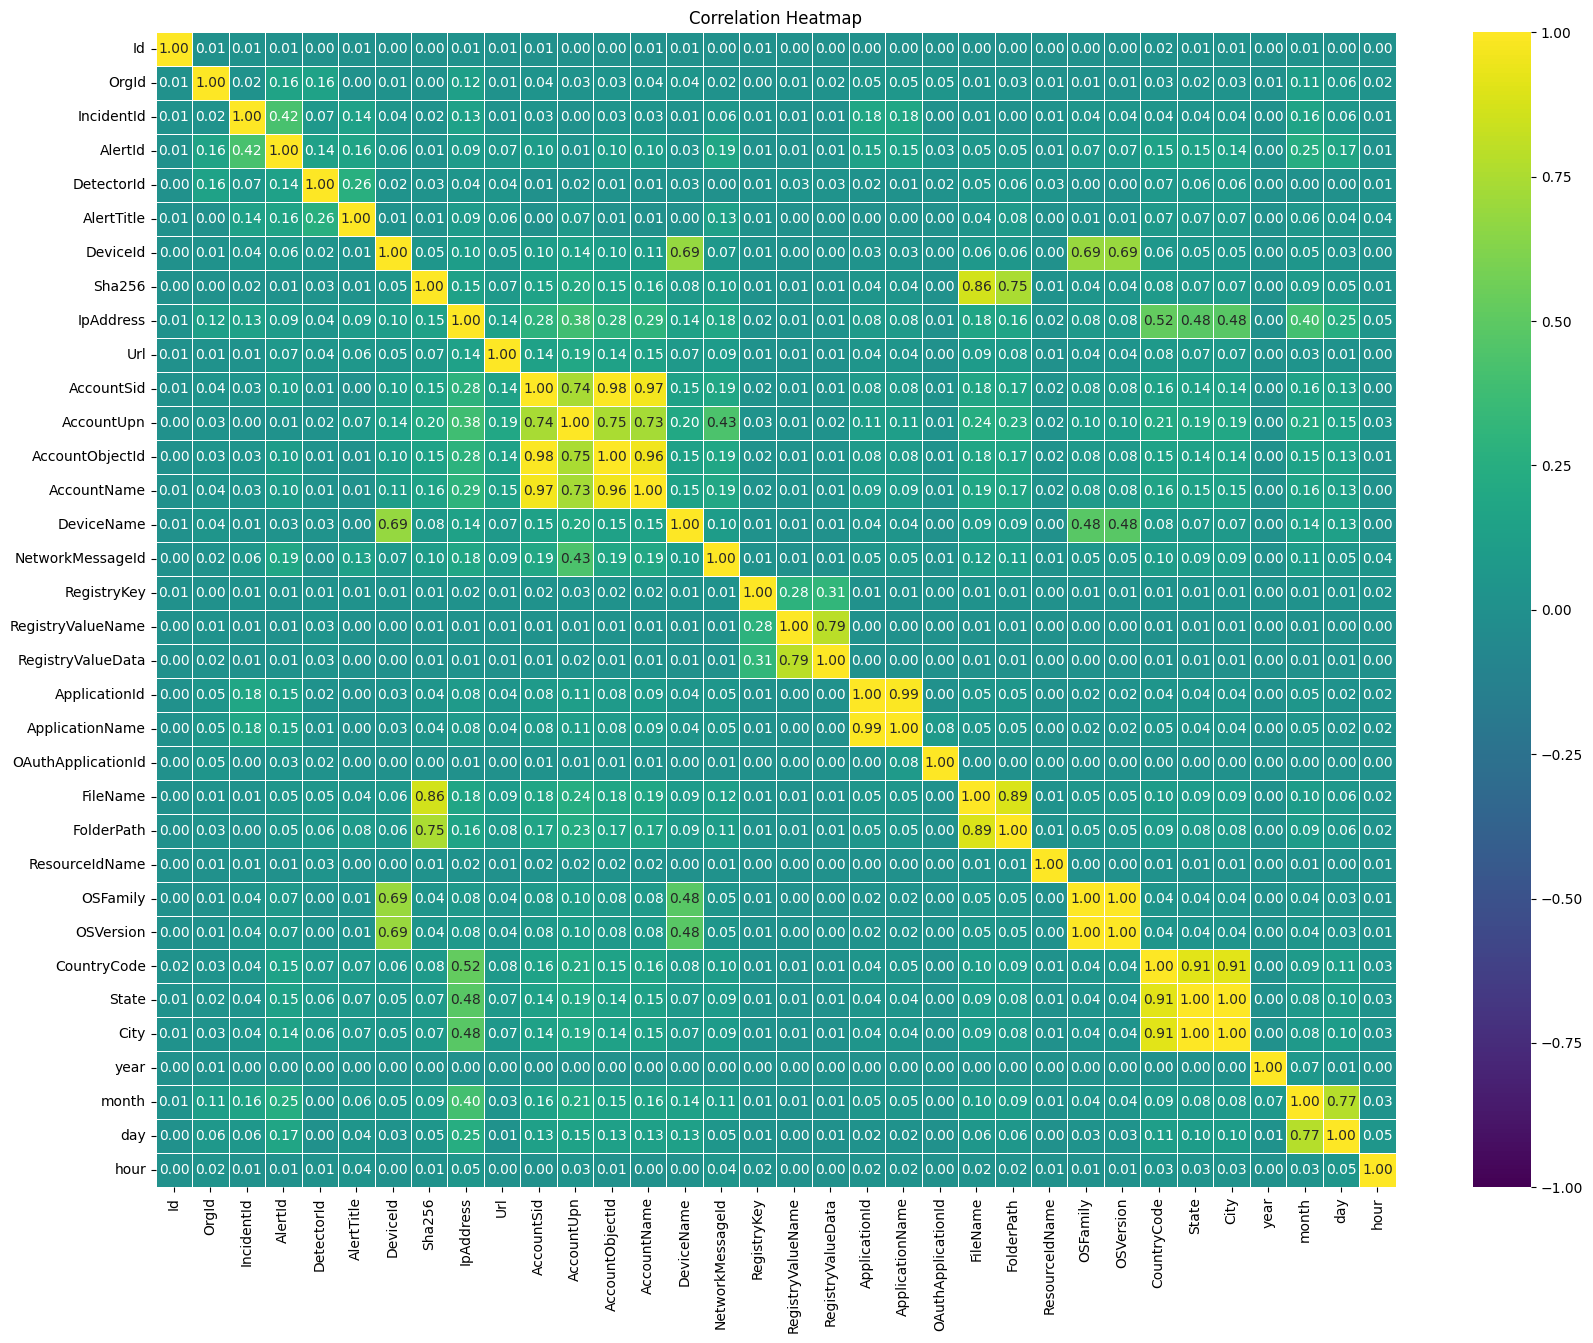

In [28]:
# Correlation heatmap for all numerical columns in our dataset

numerical_df = mini_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

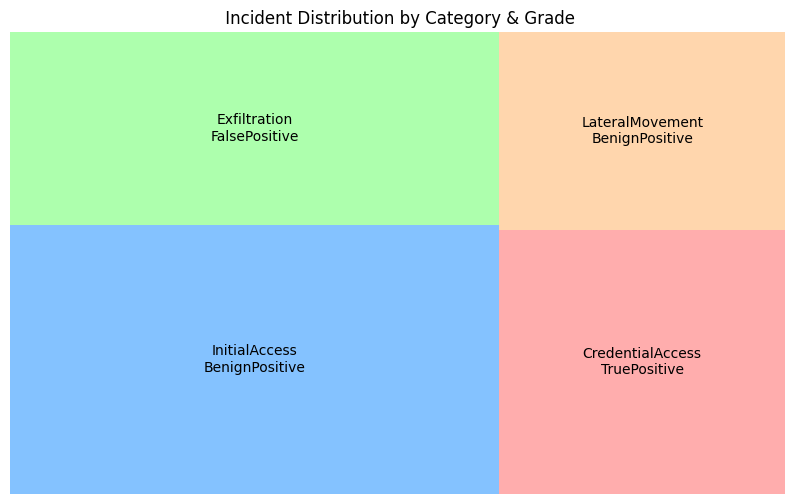

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Sample simulation of your dataset
data = {
    'Category': ['InitialAccess', 'Exfiltration', 'CredentialAccess', 'LateralMovement'],
    'IncidentGrade': ['BenignPositive', 'FalsePositive', 'TruePositive', 'BenignPositive'],
    'Count': [35000, 25000, 20000, 15000]
}
df = pd.DataFrame(data)

# Combine Category and Grade for labels
df['Label'] = df['Category'] + '\n' + df['IncidentGrade']

# Plot
plt.figure(figsize=(10, 6))
squarify.plot(sizes=df['Count'], label=df['Label'], alpha=0.8, color=['#66b3ff','#99ff99','#ff9999','#ffcc99'])
plt.axis('off')
plt.title(' Incident Distribution by Category & Grade')
plt.show()

In [32]:
import numpy as np
threshold = 0.5

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y]) 
                    for x, y in zip(*high_corr_var) 
                    if x != y and x < y]
high_corr_pairs

[('DeviceId', 'DeviceName'),
 ('DeviceId', 'OSFamily'),
 ('DeviceId', 'OSVersion'),
 ('Sha256', 'FileName'),
 ('Sha256', 'FolderPath'),
 ('IpAddress', 'CountryCode'),
 ('AccountSid', 'AccountUpn'),
 ('AccountSid', 'AccountObjectId'),
 ('AccountSid', 'AccountName'),
 ('AccountUpn', 'AccountObjectId'),
 ('AccountUpn', 'AccountName'),
 ('AccountObjectId', 'AccountName'),
 ('RegistryValueName', 'RegistryValueData'),
 ('ApplicationId', 'ApplicationName'),
 ('FileName', 'FolderPath'),
 ('OSFamily', 'OSVersion'),
 ('CountryCode', 'State'),
 ('CountryCode', 'City'),
 ('State', 'City'),
 ('month', 'day')]

In [33]:
# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
        columns_to_remove.add(col2)  # Default to adding the second column in each pair

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = mini_df.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
df_cleaned_corr.head()

Columns removed: ['DeviceName', 'ApplicationName', 'OSVersion', 'AccountObjectId', 'City', 'RegistryValueData', 'State', 'AccountUpn', 'FileName', 'day', 'CountryCode', 'AccountName', 'OSFamily', 'FolderPath']


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,AccountSid,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,year,month,hour
4664997,1151051239177,12,2278,1280,16,499,Impact,BenignPositive,Ip,Related,...,441377,529644,1631,635,2251,881,3586,2024,5,19
3950835,936302871369,862,16616,40332,11,9,InitialAccess,BenignPositive,MailMessage,Related,...,441377,21718,1631,635,2251,881,3586,2024,6,19
1831432,455266534648,1002,3187,3292,665,891,CredentialAccess,BenignPositive,User,Impacted,...,377412,529644,1631,635,2251,881,3586,2024,6,6
1953711,1288490192781,619,372328,850243,0,0,InitialAccess,FalsePositive,Ip,Related,...,441377,529644,1631,635,2251,881,3586,2024,6,4
2413287,1262720387558,28,346,2659,1,1,InitialAccess,FalsePositive,MailMessage,Related,...,441377,292359,1631,635,2251,881,3586,2024,6,6


label encoder for category column

In [34]:
# Label encoding for categorical columns. We are not using Onehot encoding because there are very high number of categories in categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
df_cleaned_corr.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,AccountSid,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,year,month,hour
4664997,1151051239177,12,2278,1280,16,499,9,0,8,1,...,441377,529644,1631,635,2251,881,3586,2024,5,19
3950835,936302871369,862,16616,40332,11,9,10,0,11,1,...,441377,21718,1631,635,2251,881,3586,2024,6,19
1831432,455266534648,1002,3187,3292,665,891,2,0,21,0,...,377412,529644,1631,635,2251,881,3586,2024,6,6
1953711,1288490192781,619,372328,850243,0,0,10,1,8,1,...,441377,529644,1631,635,2251,881,3586,2024,6,4
2413287,1262720387558,28,346,2659,1,1,10,1,11,1,...,441377,292359,1631,635,2251,881,3586,2024,6,6


In [35]:
df_cleaned_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4664997 to 712870
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Id                  100000 non-null  int64
 1   OrgId               100000 non-null  int64
 2   IncidentId          100000 non-null  int64
 3   AlertId             100000 non-null  int64
 4   DetectorId          100000 non-null  int64
 5   AlertTitle          100000 non-null  int64
 6   Category            100000 non-null  int64
 7   IncidentGrade       100000 non-null  int64
 8   EntityType          100000 non-null  int64
 9   EvidenceRole        100000 non-null  int64
 10  DeviceId            100000 non-null  int64
 11  Sha256              100000 non-null  int64
 12  IpAddress           100000 non-null  int64
 13  Url                 100000 non-null  int64
 14  AccountSid          100000 non-null  int64
 15  NetworkMessageId    100000 non-null  int64
 16  RegistryKey        

In [36]:
# Save label encoders for categorical features, for easy use on test dataset
import joblib
for column, le in label_encoders.items():
    joblib.dump(le, f'labels/{column}_label_encoder.pkl')

In [37]:
df_cleaned_corr.to_csv('prediction_data.csv', index=False)